In [1]:
#import the module for perform data analytics

import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset into a Pandas DataFrame

dataset_path = 'dataset.csv'
data = pd.read_csv(dataset_path)
data.style


In [3]:
#  PART 1: In this process we are going the clean and preprocess the dataset

In [4]:
# Get information about the dataset, including data types and null values
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 69 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Table Code                                                                                                   594 non-null    object
 1   State Code                                                                                                   594 non-null    object
 2   District Code                                                                                                594 non-null    object
 3   Area Name                                                                                                    594 non-null    object
 4   Total/ Rural/ Urban                                                 

In [5]:
print(data.describe())

       Worked for 3 months or more but less than 6 months -  Persons  \
count                                       5.940000e+02               
mean                                        1.617277e+04               
std                                         7.607172e+04               
min                                         0.000000e+00               
25%                                         2.872500e+02               
50%                                         2.225500e+03               
75%                                         9.628500e+03               
max                                         1.200828e+06               

       Worked for 3 months or more but less than 6 months - Males  \
count                                         594.000000            
mean                                         7932.700337            
std                                         36864.822704            
min                                             0.000000            
25%   

In [6]:
print(data.isnull().sum())  

Table Code                                          0
State Code                                          0
District Code                                       0
Area Name                                           0
Total/ Rural/ Urban                                 0
                                                   ..
Industrial Category - R to U - HHI - Males          0
Industrial Category - R to U - HHI - Females        0
Industrial Category - R to U - Non HHI - Persons    0
Industrial Category - R to U - Non HHI - Males      0
Industrial Category - R to U - Non HHI - Females    0
Length: 69, dtype: int64


In [7]:
# handling missing values: drop rows with NaN values
data_clean = data.dropna()

# Example of removing duplicates
data_clean = data_clean.drop_duplicates()

In [8]:
# Save the preprocessed data to a new CSV file
data.to_csv('preprocessed_data.csv', index=False)
data.style

In [9]:
# PART 2: Perform the demographic analysis and create visualizations. 

In [10]:

marginal_workers_data = pd.read_csv('dataset.csv')


In [11]:
#To perform the demographic analysis we want to kown about the colunm heading
marginal_workers_data = pd.read_csv('dataset.csv')
column_headings = marginal_workers_data.columns
print("Column Headings:")
print(column_headings)

Column Headings:
Index(['Table Code', 'State Code', 'District Code', 'Area Name',
       'Total/ Rural/ Urban', 'Age group',
       'Worked for 3 months or more but less than 6 months -  Persons',
       'Worked for 3 months or more but less than 6 months - Males',
       'Worked for 3 months or more but less than 6 months - Females',
       'Worked for less than 3 months - Persons',
       'Worked for less than 3 months - Males',
       'Worked for less than 3 months - Females',
       'Industrial Category - A - Cultivators - Persons',
       'Industrial Category - A - Cultivators - Males',
       'Industrial Category - A - Cultivators - Females',
       'Industrial Category - A - Agricultural labourers - Persons',
       'Industrial Category - A - Agricultural labourers - Males',
       'Industrial Category - A - Agricultural labourers - Females',
       'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons',
       'Industrial C

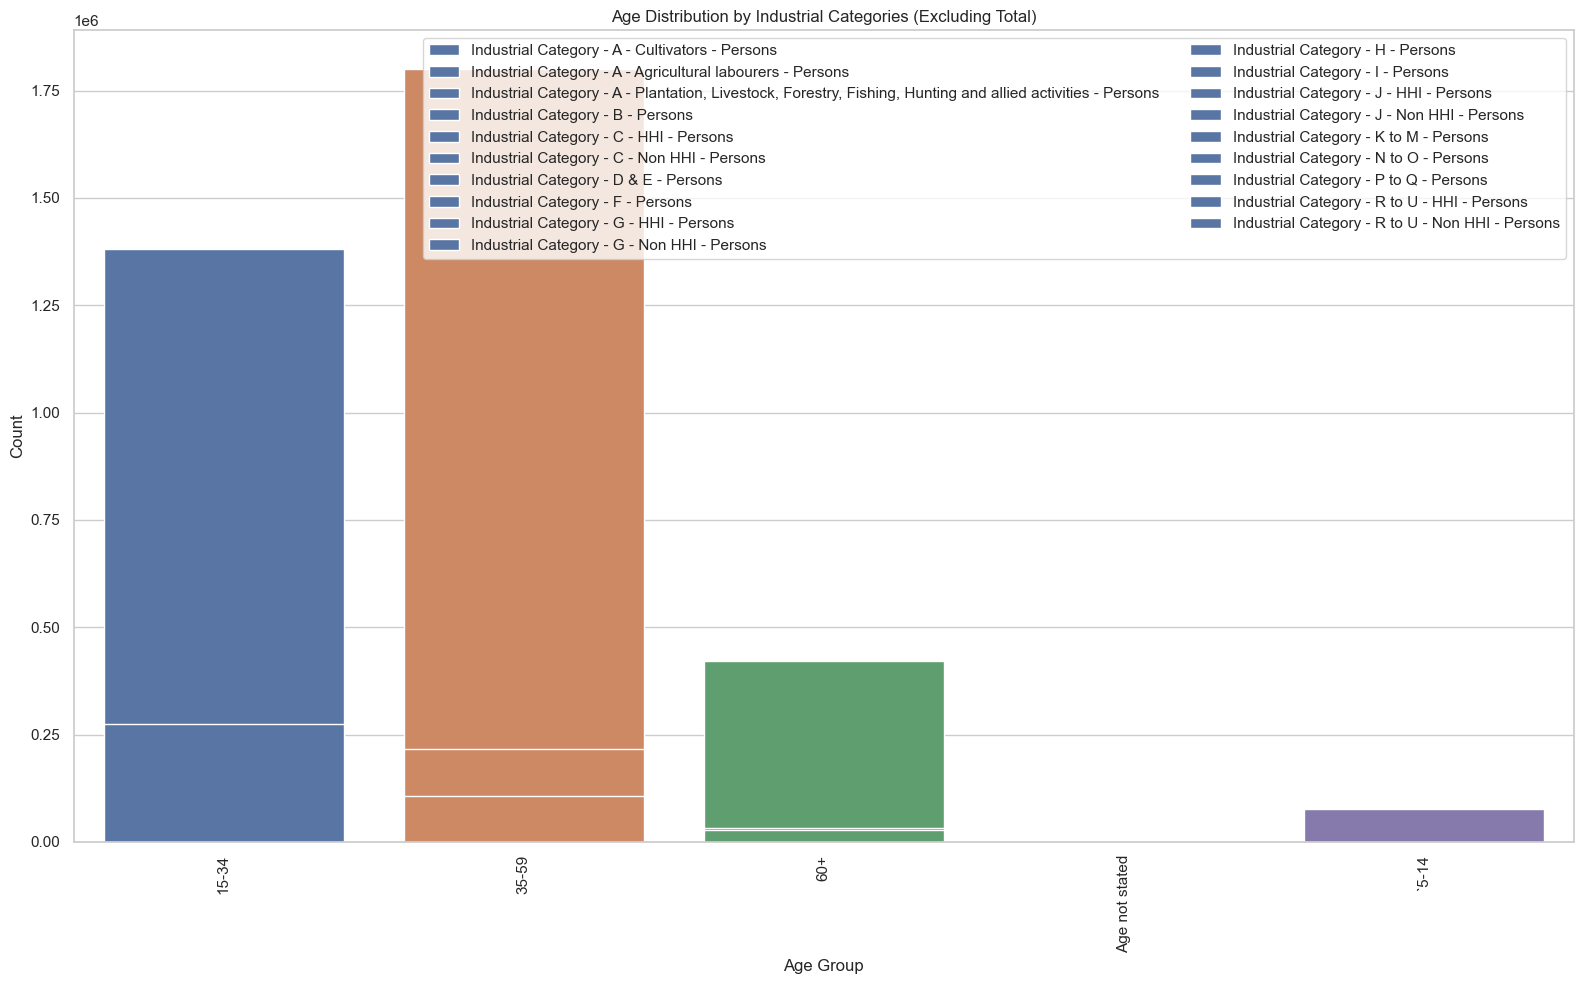

In [12]:
# we perform the age group distribution from the industrial category

# Select relevant columns for age groups and all industrial categories
age_industrial_columns = [
     'Age group',
    'Industrial Category - A - Cultivators - Persons',
    'Industrial Category - A - Agricultural labourers - Persons',
    'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons',
    'Industrial Category - B - Persons',
    'Industrial Category - C - HHI - Persons',
    'Industrial Category - C - Non HHI - Persons',
    'Industrial Category - D & E - Persons',
    'Industrial Category - F - Persons',
    'Industrial Category - G - HHI - Persons',
    'Industrial Category - G - Non HHI - Persons',
    'Industrial Category - H - Persons',
    'Industrial Category - I - Persons',
    'Industrial Category - J - HHI - Persons',
    'Industrial Category - J - Non HHI - Persons',
    'Industrial Category - K to M - Persons',
    'Industrial Category - N to O - Persons',
    'Industrial Category - P to Q - Persons',
    'Industrial Category - R to U - HHI - Persons',
    'Industrial Category - R to U - Non HHI - Persons'
]

# Filter out rows where 'Age group' is not equal to 'Total'
filtered_data = marginal_workers_data[marginal_workers_data['Age group'] != 'Total']

age_industrial_data = filtered_data[age_industrial_columns]

age_distribution = age_industrial_data.groupby('Age group').sum()

plt.figure(figsize=(16, 10))  # Adjust width and height as needed

sns.set(style="whitegrid")


for column in age_distribution.columns:
    sns.barplot(x=age_distribution.index, y=column, data=age_distribution, label=column)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution by Industrial Categories (Excluding Total)')
plt.xticks(rotation=90)
plt.legend(ncol=2, loc='upper right')
plt.tight_layout()
plt.show()


In [13]:
# perform the industrail category distribution and we sum all the industrail category person 
industrial_categories = [
    'Industrial Category - A - Cultivators - Persons', 
    'Industrial Category - A - Agricultural labourers - Persons', 
    'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons', 
    'Industrial Category - B - Persons', 
    'Industrial Category - C - HHI - Persons', 
    'Industrial Category - C - Non HHI - Persons', 
    'Industrial Category - D & E - Persons', 
    'Industrial Category - F - Persons', 
    'Industrial Category - G - HHI - Persons', 
    'Industrial Category - G - Non HHI - Persons', 
    'Industrial Category - H - Persons', 
    'Industrial Category - I - Persons', 
    'Industrial Category - J - HHI - Persons', 
    'Industrial Category - J - Non HHI - Persons', 
    'Industrial Category - K to M - Persons', 
    'Industrial Category - N to O - Persons', 
    'Industrial Category - P to Q - Persons', 
    'Industrial Category - R to U - HHI - Persons', 
    'Industrial Category - R to U - Non HHI - Persons'
]
industrial_category_distribution = marginal_workers_data[industrial_categories].sum()
print("Industrial Category Distribution:")
print(industrial_category_distribution)

Industrial Category Distribution:
Industrial Category - A - Cultivators - Persons                                                                 513880
Industrial Category - A - Agricultural labourers - Persons                                                     7262016
Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons     235280
Industrial Category - B - Persons                                                                                22824
Industrial Category - C - HHI - Persons                                                                         171888
Industrial Category - C - Non HHI - Persons                                                                     498944
Industrial Category - D & E - Persons                                                                            15272
Industrial Category - F - Persons                                                                               912424
Industrial Cat

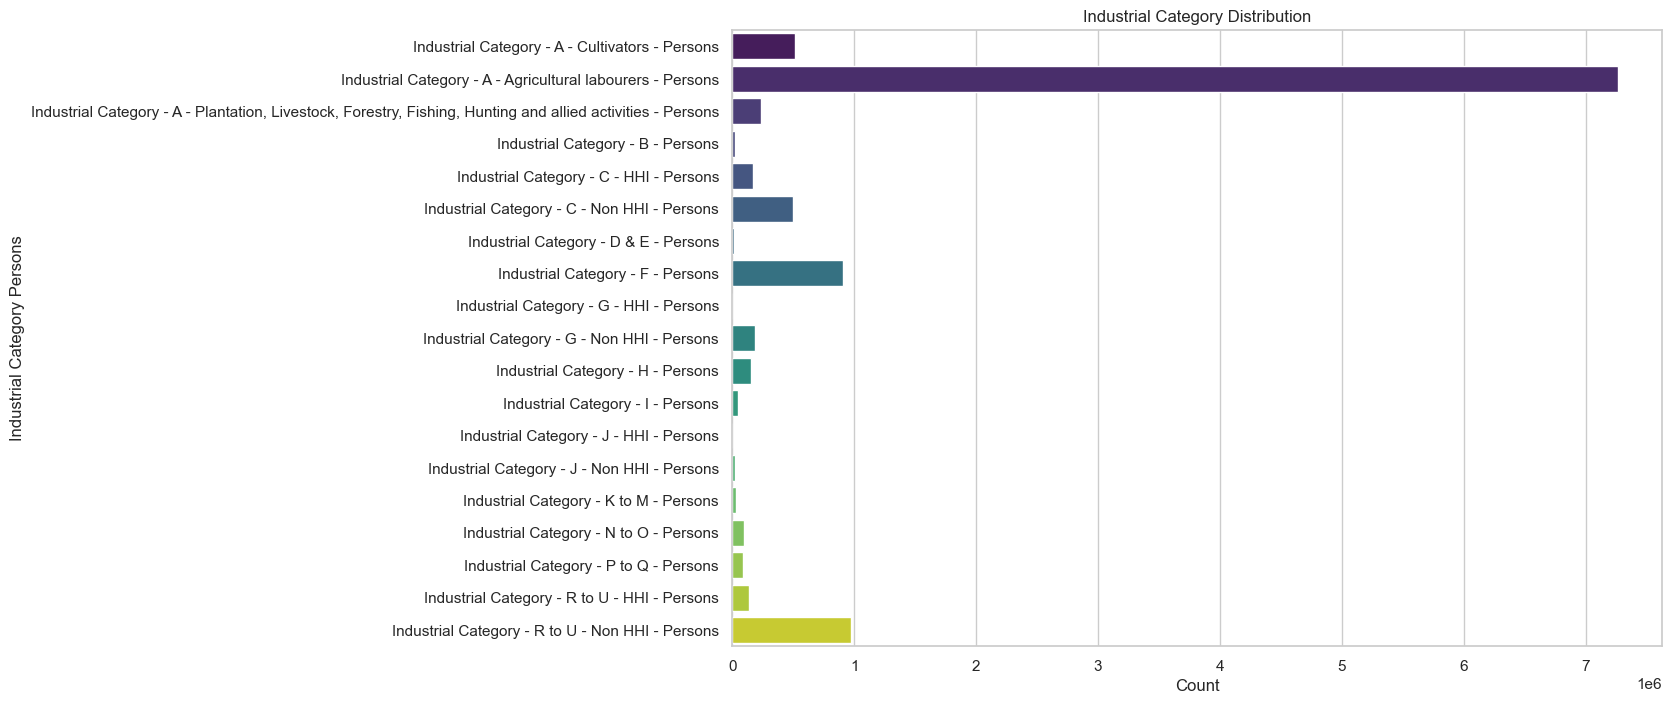

In [14]:
# we performing the industrial distribution by the total number of person
category_distribution_df = pd.DataFrame(industrial_category_distribution, columns=['Count'])
category_distribution_df.reset_index(inplace=True)
category_distribution_df.rename(columns={'index': 'Industrial Category'}, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Industrial Category', data=category_distribution_df, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Industrial Category Persons')
plt.title('Industrial Category Distribution')
plt.show()


In [15]:
# perform the industrail category distribution and we sum all the industrail category males
industrial_categories = [
     'Industrial Category - A - Cultivators - Males', 
     'Industrial Category - A - Agricultural labourers - Males',
 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Males', 
    'Industrial Category - B - Males', 
 'Industrial Category - C - HHI - Males', 
   'Industrial Category - C - Non HHI - Males', 
  'Industrial Category - D & E - Males', 
     'Industrial Category - F - Males', 
   'Industrial Category - G - HHI - Males', 
     'Industrial Category - G - Non HHI - Males', 
     'Industrial Category - H - Males',
     'Industrial Category - I - Males', 
     'Industrial Category - J - HHI - Males', 
     'Industrial Category - J - Non HHI - Males', 
     'Industrial Category - K to M - Males', 
     'Industrial Category - N to O - Males',
     'Industrial Category - P to Q - Males', 
    'Industrial Category - R to U - HHI - Males', 
 'Industrial Category - R to U - Non HHI - Males'
]
industrial_category_distribution = marginal_workers_data[industrial_categories].sum()
print("Industrial Category Distribution:")
print(industrial_category_distribution)

Industrial Category Distribution:
Industrial Category - A - Cultivators - Males                                                                 277056
Industrial Category - A - Agricultural labourers - Males                                                     3238752
Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Males     130144
Industrial Category - B - Males                                                                                14896
Industrial Category - C - HHI - Males                                                                          62744
Industrial Category - C - Non HHI - Males                                                                     300160
Industrial Category - D & E - Males                                                                            11736
Industrial Category - F - Males                                                                               521840
Industrial Category - G - HHI 

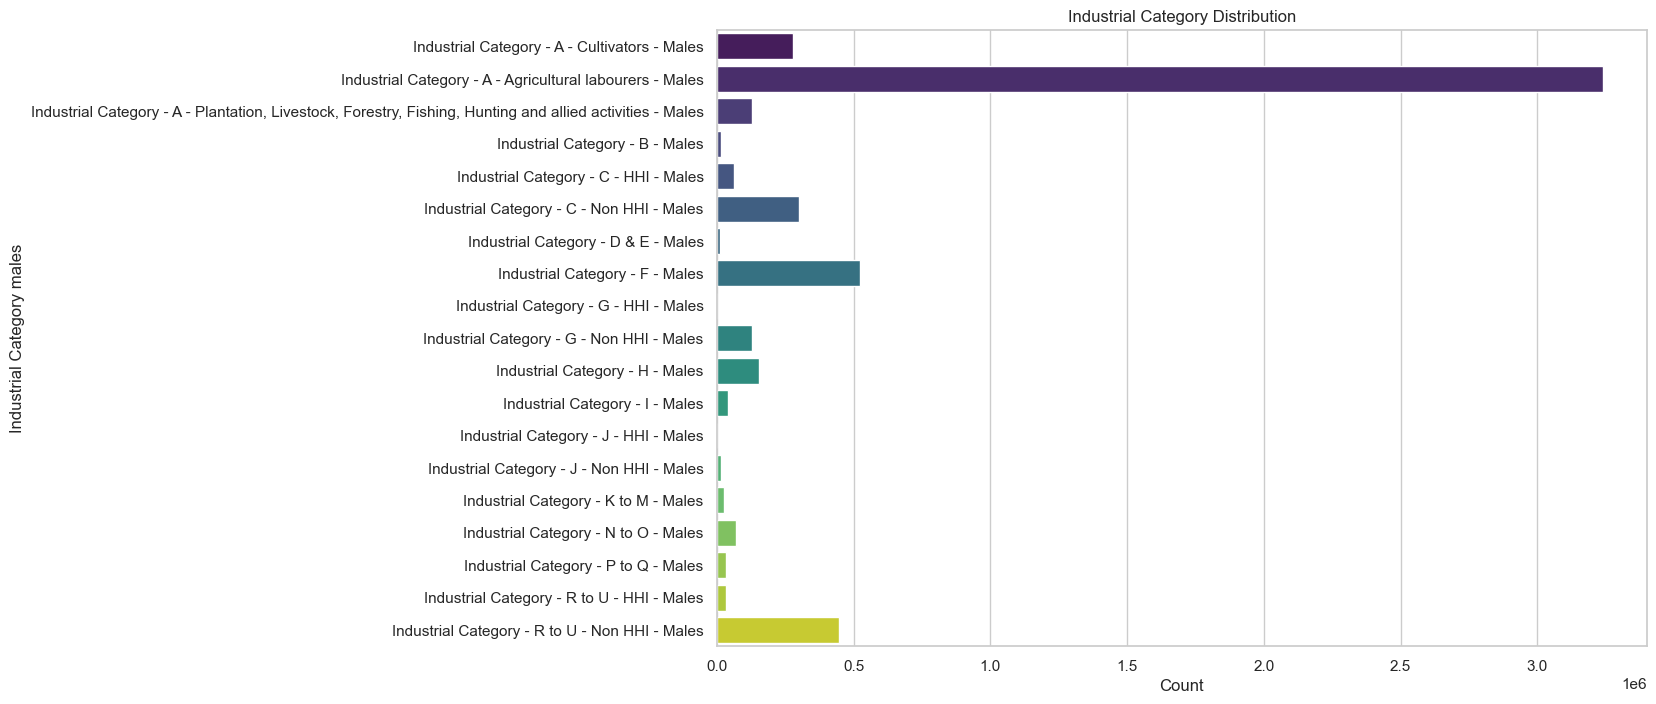

In [16]:
# we performing the industrial distribution by the total number of males
category_distribution_df = pd.DataFrame(industrial_category_distribution, columns=['Count'])
category_distribution_df.reset_index(inplace=True)
category_distribution_df.rename(columns={'index': 'Industrial Category'}, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Industrial Category', data=category_distribution_df, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Industrial Category males')
plt.title('Industrial Category Distribution')
plt.show()

In [17]:
# perform the industrail category distribution and we sum all the industrail category females
industrial_categories = [
     'Industrial Category - A - Cultivators - Females',
      'Industrial Category - A - Agricultural labourers - Females',
  'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Females',
 'Industrial Category - B - Females',
 'Industrial Category - C - HHI - Females',
 'Industrial Category - C - Non HHI - Females',
 'Industrial Category - D & E - Females',
 'Industrial Category - F - Females',
 'Industrial Category - G - HHI - Females',
'Industrial Category - G - Non HHI - Females',
'Industrial Category - H - Females',
 'Industrial Category - I - Females',
'Industrial Category - J - HHI - Females',
 'Industrial Category - J - Non HHI - Females',
 'Industrial Category - K to M - Females',
 'Industrial Category - N to O - Females',
    'Industrial Category - P to Q - Females',
'Industrial Category - R to U - HHI - Females',
  'Industrial Category - R to U - Non HHI - Females'
]
industrial_category_distribution = marginal_workers_data[industrial_categories].sum()
print("Industrial Category Distribution:")
print(industrial_category_distribution)

Industrial Category Distribution:
Industrial Category - A - Cultivators - Females                                                                 236824
Industrial Category - A - Agricultural labourers - Females                                                     4023264
Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Females     105136
Industrial Category - B - Females                                                                                 7928
Industrial Category - C - HHI - Females                                                                         109144
Industrial Category - C - Non HHI - Females                                                                     198784
Industrial Category - D & E - Females                                                                             3536
Industrial Category - F - Females                                                                               390584
Industrial Cat

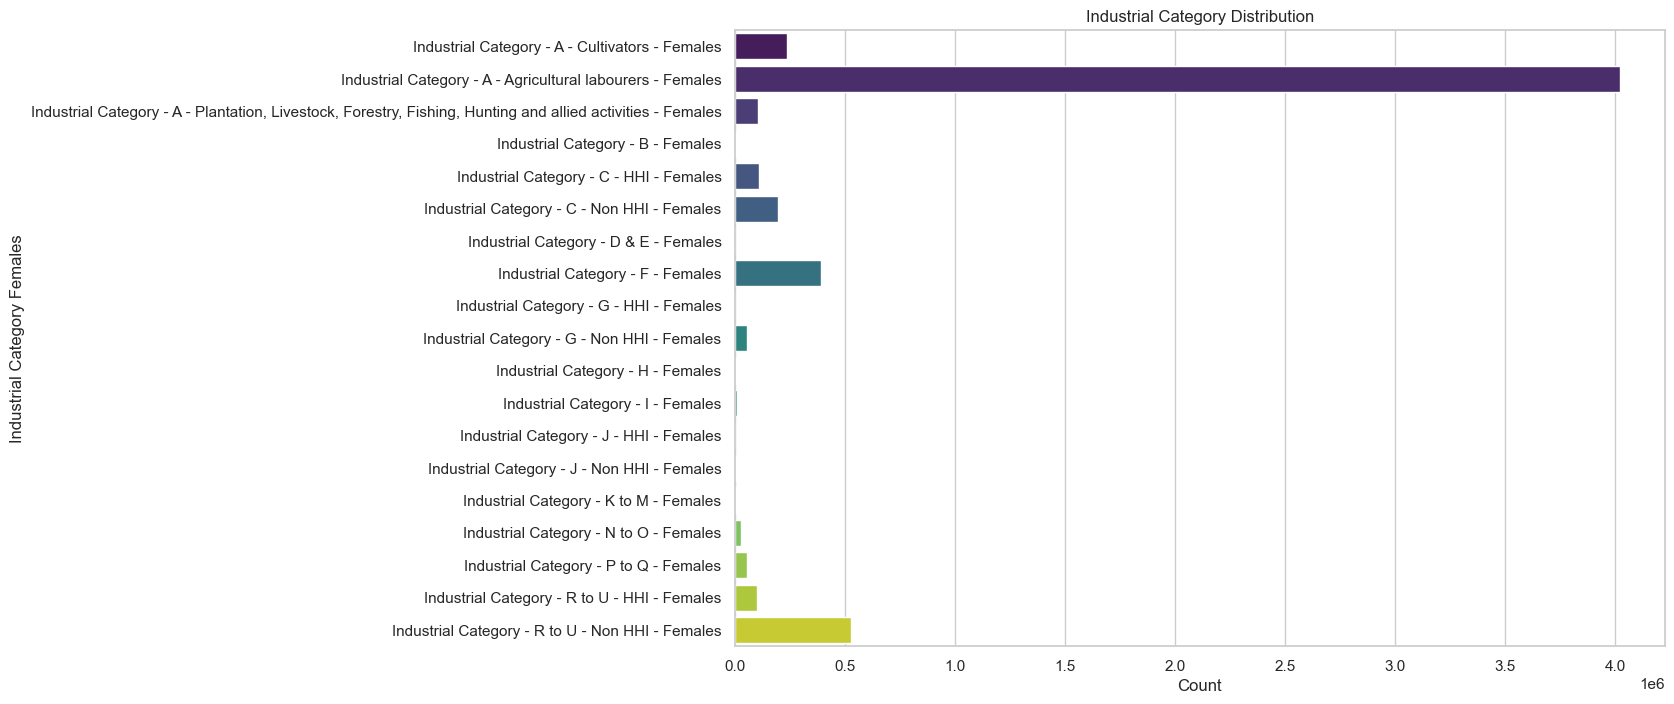

In [18]:
# we performing the industrial distribution by the total number of females
category_distribution_df = pd.DataFrame(industrial_category_distribution, columns=['Count'])
category_distribution_df.reset_index(inplace=True)
category_distribution_df.rename(columns={'index': 'Industrial Category'}, inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Industrial Category', data=category_distribution_df, orient='h', palette='viridis')
plt.xlabel('Count')
plt.ylabel('Industrial Category Females')
plt.title('Industrial Category Distribution')
plt.show()

In [19]:
# performing the sex distribution using the industrial category and find the sum of person ,male and female 
industrial_categories_pairs = [
    ('Industrial Category - A - Cultivators - Persons', 'Industrial Category - A - Cultivators - Males', 'Industrial Category - A - Cultivators - Females'),
    ('Industrial Category - A - Agricultural labourers - Persons', 'Industrial Category - A - Agricultural labourers - Males', 'Industrial Category - A - Agricultural labourers - Females'),
    ('Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons', 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Males', 'Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Females'),
    ('Industrial Category - B - Persons', 'Industrial Category - B - Males', 'Industrial Category - B - Females'),
    ('Industrial Category - C - HHI - Persons', 'Industrial Category - C - HHI - Males', 'Industrial Category - C - HHI - Females'),
    ('Industrial Category - C - Non HHI - Persons', 'Industrial Category - C - Non HHI - Males', 'Industrial Category - C - Non HHI - Females'),
    ('Industrial Category - D & E - Persons', 'Industrial Category - D & E - Males', 'Industrial Category - D & E - Females'),
    ('Industrial Category - F - Persons', 'Industrial Category - F - Males', 'Industrial Category - F - Females'),
    ('Industrial Category - G - HHI - Persons', 'Industrial Category - G - HHI - Males', 'Industrial Category - G - HHI - Females'),
    ('Industrial Category - G - Non HHI - Persons', 'Industrial Category - G - Non HHI - Males', 'Industrial Category - G - Non HHI - Females'),
    ('Industrial Category - H - Persons', 'Industrial Category - H - Males', 'Industrial Category - H - Females'),
    ('Industrial Category - I - Persons', 'Industrial Category - I - Males', 'Industrial Category - I - Females'),
    ('Industrial Category - J - HHI - Persons', 'Industrial Category - J - HHI - Males', 'Industrial Category - J - HHI - Females'),
    ('Industrial Category - J - Non HHI - Persons', 'Industrial Category - J - Non HHI - Males', 'Industrial Category - J - Non HHI - Females'),
    ('Industrial Category - K to M - Persons', 'Industrial Category - K to M - Males', 'Industrial Category - K to M - Females'),
    ('Industrial Category - N to O - Persons', 'Industrial Category - N to O - Males', 'Industrial Category - N to O - Females'),
    ('Industrial Category - P to Q - Persons', 'Industrial Category - P to Q - Males', 'Industrial Category - P to Q - Females'),
    ('Industrial Category - R to U - HHI - Persons', 'Industrial Category - R to U - HHI - Males', 'Industrial Category - R to U - HHI - Females'),
    ('Industrial Category - R to U - Non HHI - Persons', 'Industrial Category - R to U - Non HHI - Males', 'Industrial Category - R to U - Non HHI - Females')
]
sex_distribution = {}
for category_pair in industrial_categories_pairs:
    total_persons = marginal_workers_data[category_pair[0]].sum()
    total_males = marginal_workers_data[category_pair[1]].sum()
    total_females = marginal_workers_data[category_pair[2]].sum()
    sex_distribution[category_pair[0]] = {
        'Persons': total_persons,
        'Males': total_males,
        'Females': total_females
    }
for category, counts in sex_distribution.items():
    print(f"Category: {category}")
    print(f"Persons: {counts['Persons']}")
    print(f"Males: {counts['Males']}")
    print(f"Females: {counts['Females']}")
    print("----------------------")

Category: Industrial Category - A - Cultivators - Persons
Persons: 513880
Males: 277056
Females: 236824
----------------------
Category: Industrial Category - A - Agricultural labourers - Persons
Persons: 7262016
Males: 3238752
Females: 4023264
----------------------
Category: Industrial Category - A - Plantation, Livestock, Forestry, Fishing, Hunting and allied activities - Persons
Persons: 235280
Males: 130144
Females: 105136
----------------------
Category: Industrial Category - B - Persons
Persons: 22824
Males: 14896
Females: 7928
----------------------
Category: Industrial Category - C - HHI - Persons
Persons: 171888
Males: 62744
Females: 109144
----------------------
Category: Industrial Category - C - Non HHI - Persons
Persons: 498944
Males: 300160
Females: 198784
----------------------
Category: Industrial Category - D & E - Persons
Persons: 15272
Males: 11736
Females: 3536
----------------------
Category: Industrial Category - F - Persons
Persons: 912424
Males: 521840
Females:

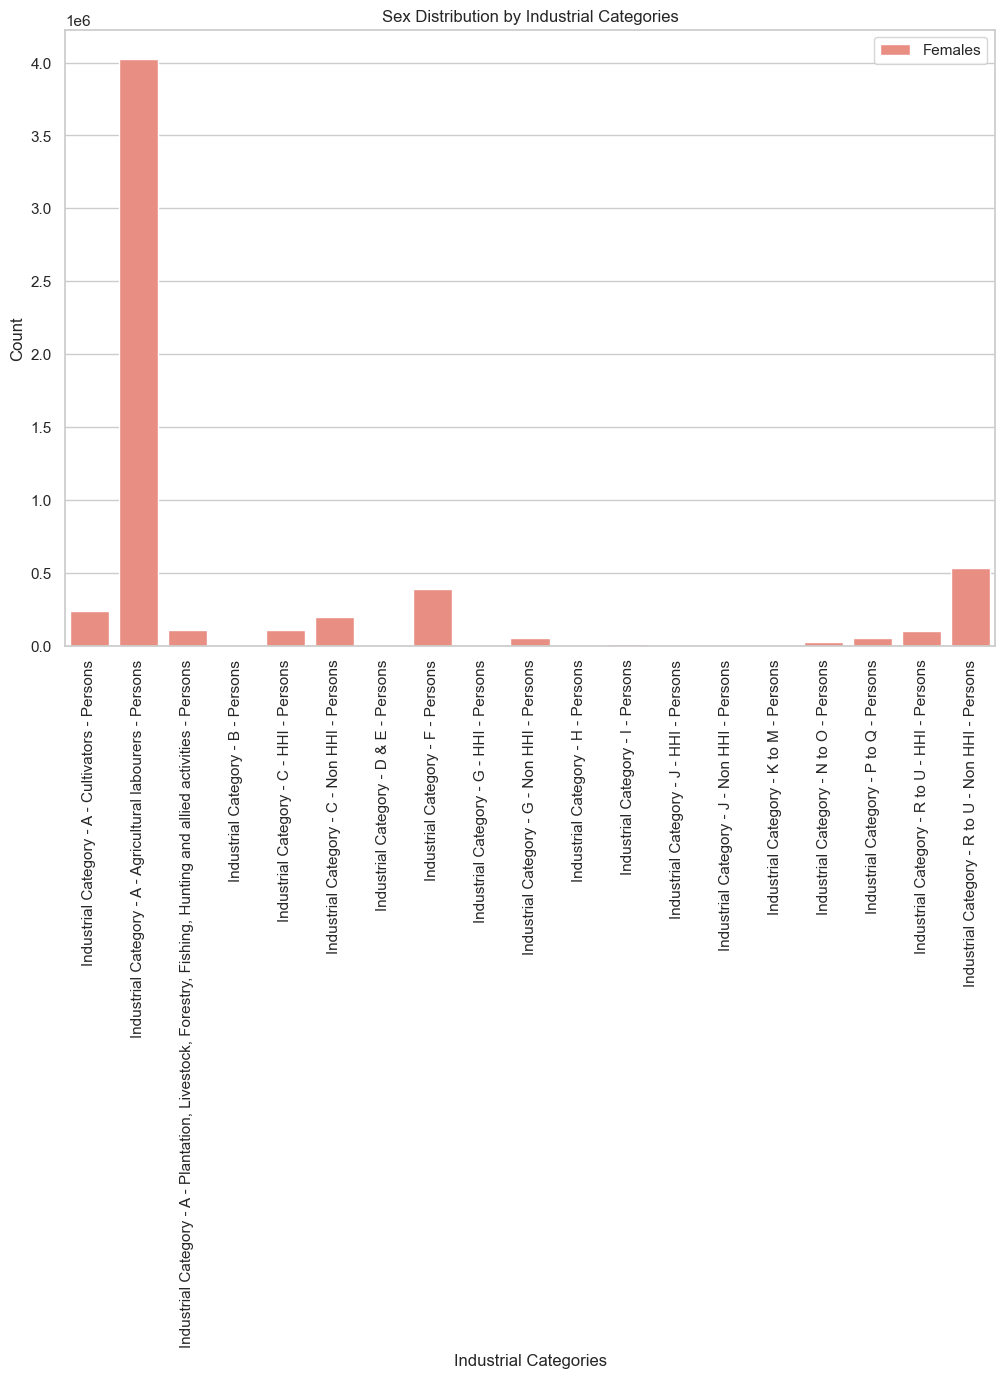

In [20]:
# perform male distributio to industrial category
sex_distribution_df = pd.DataFrame.from_dict(sex_distribution, orient='index')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x=sex_distribution_df.index, y='Females', data=sex_distribution_df, label='Females', color='salmon')
plt.xlabel('Industrial Categories')
plt.ylabel('Count')
plt.title('Sex Distribution by Industrial Categories')
plt.xticks(rotation=90)
plt.legend()
plt.show() 


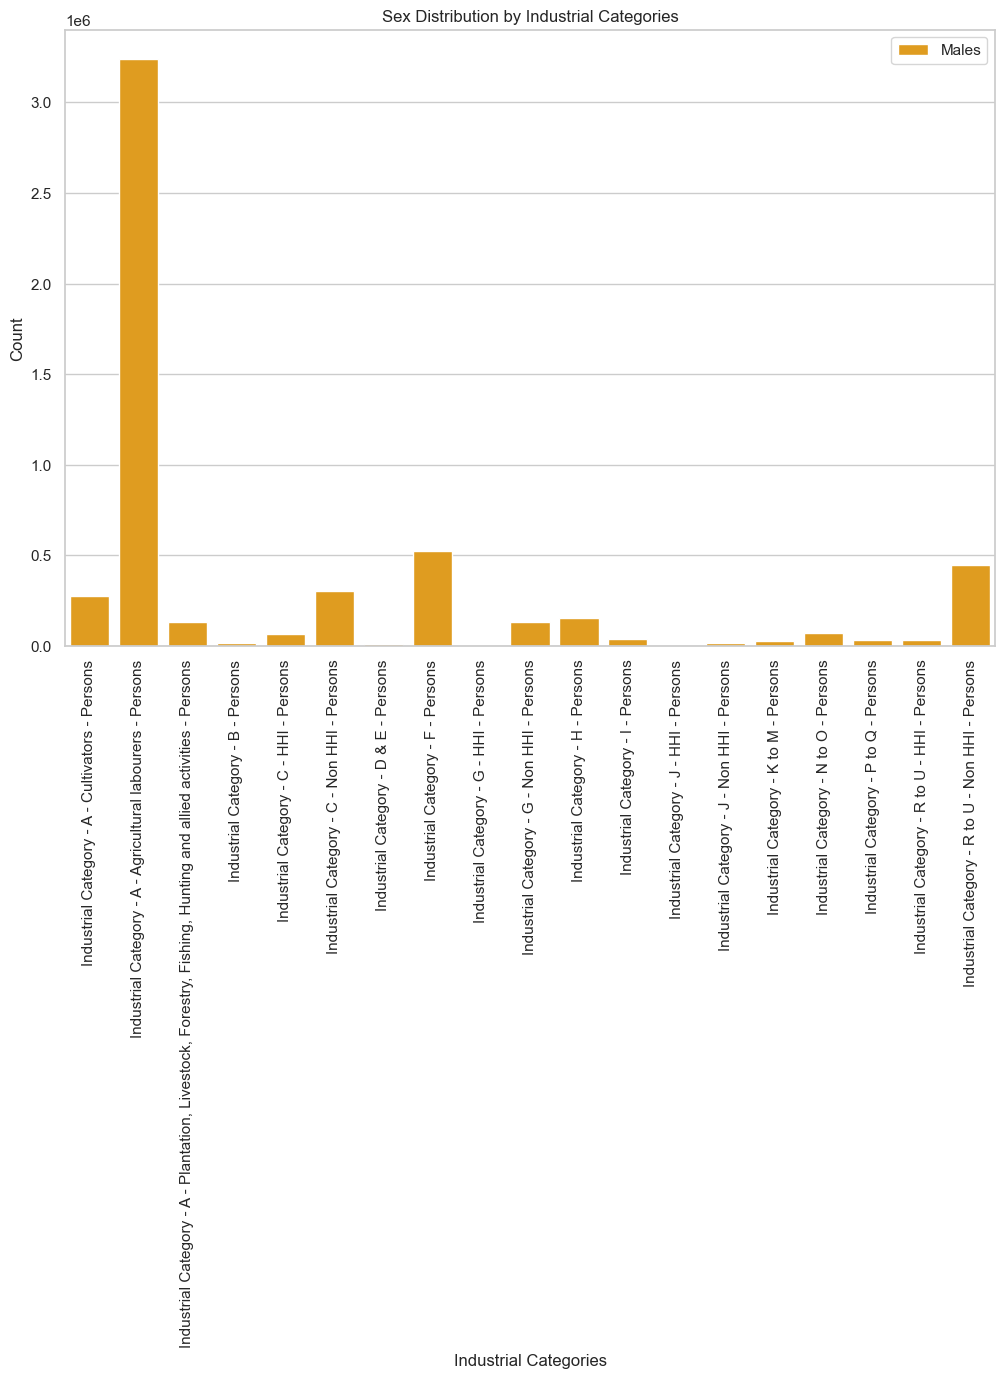

In [21]:
# perform Females distributio to industrial category
sex_distribution_df = pd.DataFrame.from_dict(sex_distribution, orient='index')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x=sex_distribution_df.index, y='Males', data=sex_distribution_df, label='Males', color='orange')
plt.xlabel('Industrial Categories')
plt.ylabel('Count')
plt.title('Sex Distribution by Industrial Categories')
plt.xticks(rotation=90)
plt.legend()
plt.show() 


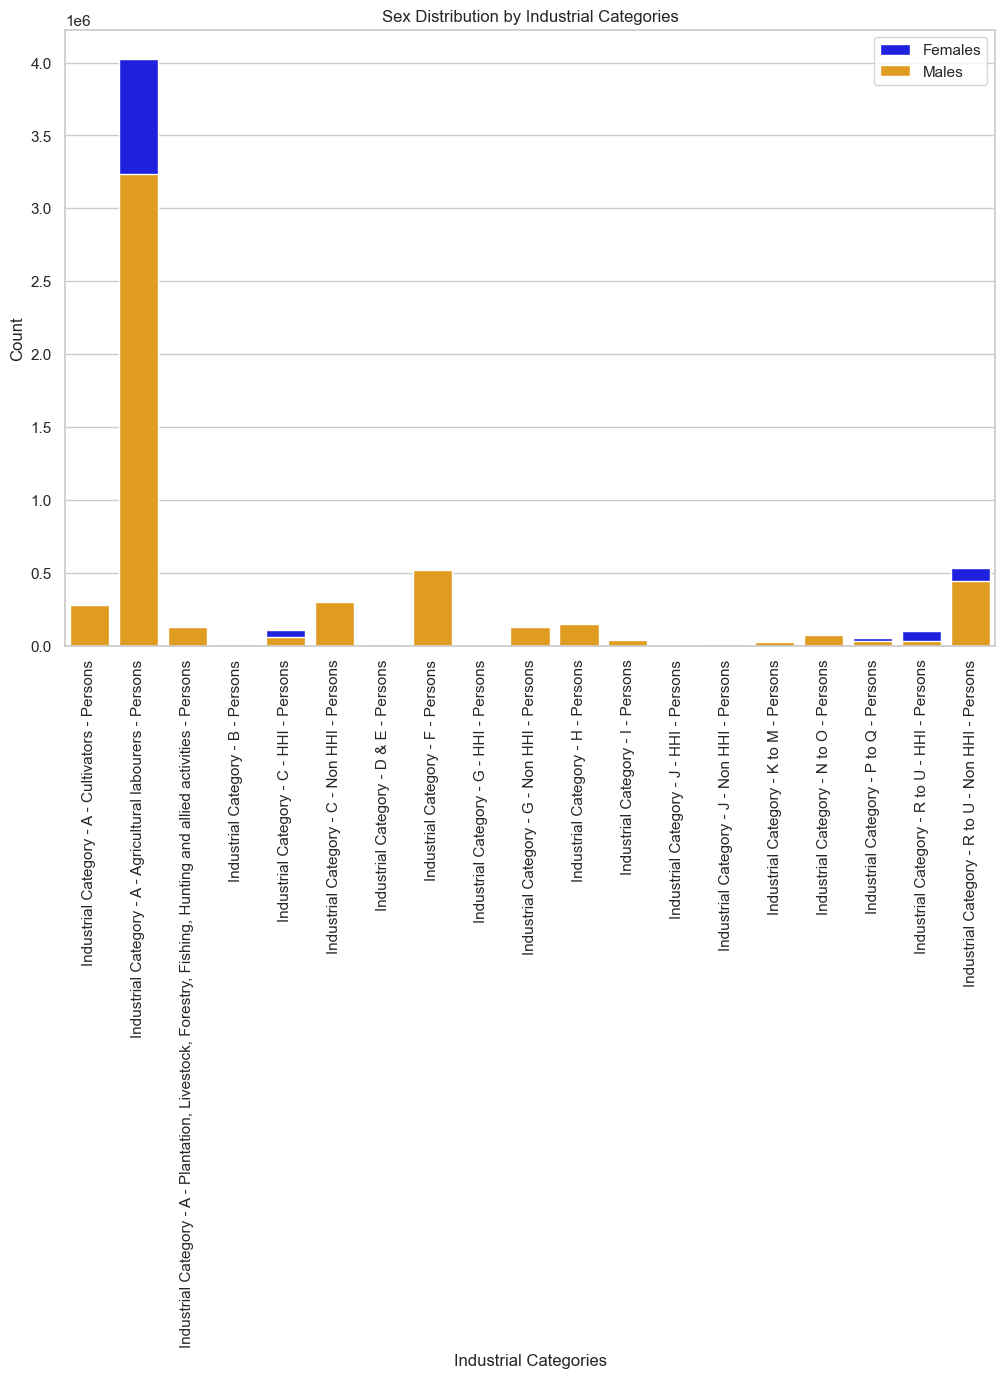

In [22]:
# perform sex distribution in industrial category
sex_distribution_df = pd.DataFrame.from_dict(sex_distribution, orient='index')
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x=sex_distribution_df.index, y='Females', data=sex_distribution_df, label='Females', color='blue')
sns.barplot(x=sex_distribution_df.index, y='Males', data=sex_distribution_df, label='Males', color='orange')
plt.xlabel('Industrial Categories')
plt.ylabel('Count')
plt.title('Sex Distribution by Industrial Categories')
plt.xticks(rotation=90)
plt.legend()
plt.show() 
